In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('my_subset.csv')
print(df.shape)
df.head()

(1000000, 9)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [5]:
'''Cleaning the loaded dataset'''
print("\nMissing values count per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# === 2. Drop rows with missing critical fields ===
# event_type and user_id are essential for funnel analysis
df = df.dropna(subset=['event_type', 'user_id'])

# === 3. Fill missing categorical fields with 'Unknown' ===
df['brand'] = df['brand'].fillna('Unknown')
df['category_code'] = df['category_code'].fillna('Unknown')

# === 4. Handle missing numerical data ===
# For price, fill missing with median price (robust to outliers)
df['price'] = df['price'].fillna(df['price'].median())

# === 5. Convert data types for efficiency and correctness ===
# Convert event_time to datetime
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

# Drop rows where event_time conversion failed (if any)
df = df.dropna(subset=['event_time'])

# Convert user_id and product_id to integer if not already
df['user_id'] = df['user_id'].astype(int)
df['product_id'] = df['product_id'].astype(int)

# === 6. Remove duplicated records ===
df = df.drop_duplicates()

# === 7. Optional: Create new cleaned columns for clarity ===
df['brand_clean'] = df['brand'].str.strip().str.lower()
df['category_clean'] = df['category_code'].str.strip().str.lower()

# === 8. Final check after cleaning ===
print("\nCleaned data shape:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum())

# === 9. Save cleaned dataset (optional) ===
# df.to_csv('cleaned_ecommerce_data.csv', index=False)

# Display first few rows of cleaned data
df.head()


Missing values count per column:
 event_time            0
event_type            0
product_id            0
category_id           0
category_code    316977
brand            147197
price                 0
user_id               0
user_session          0
dtype: int64

Data types:
 event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

Cleaned data shape: (999508, 11)

Missing values after cleaning:
 event_time        0
event_type        0
product_id        0
category_id       0
category_code     0
brand             0
price             0
user_id           0
user_session      0
brand_clean       0
category_clean    0
dtype: int64


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand_clean,category_clean
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,xiaomi,electronics.smartphone
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,janome,appliances.sewing_machine
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,Unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,creed,unknown
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,lg,appliances.kitchen.washer
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,xiaomi,electronics.smartphone


In [6]:
  #Understanding the dataset (EDA)
  print(df.columns)
  print(df['event_type'].value_counts())
  print(df.info())

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'brand_clean', 'category_clean'],
      dtype='object')
event_type
view        967187
purchase     17816
cart         14505
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 999508 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   event_time      999508 non-null  datetime64[ns, UTC]
 1   event_type      999508 non-null  object             
 2   product_id      999508 non-null  int32              
 3   category_id     999508 non-null  int64              
 4   category_code   999508 non-null  object             
 5   brand           999508 non-null  object             
 6   price           999508 non-null  float64            
 7   user_id         999508 non-null  int32              
 8   user_session    999

In [7]:
'''User drop off analysis'''
unique_users = df[df['event_type'].isin(['view', 'cart', 'purchase'])] \
    .groupby('event_type')['user_id'].nunique() \
    .reindex(['view', 'cart', 'purchase'])
print(unique_users)


conv_df = unique_users.to_frame().reset_index()
conv_df.columns = ['Funnel Step', 'Unique Users']
conv_df['Conversion Rate (%)'] = conv_df['Unique Users'] / conv_df['Unique Users'].iloc[0] * 100

print(conv_df)

event_type
view        170321
cart          8375
purchase     13229
Name: user_id, dtype: int64
  Funnel Step  Unique Users  Conversion Rate (%)
0        view        170321           100.000000
1        cart          8375             4.917186
2    purchase         13229             7.767099


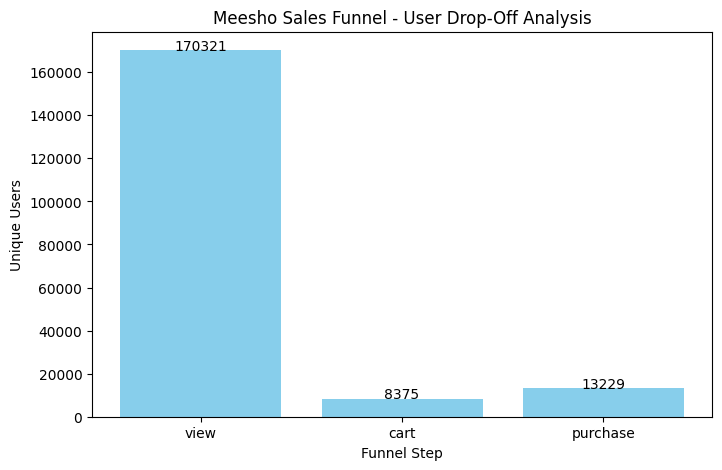

In [8]:
'''Visualisation of user drop off '''
plt.figure(figsize=(8,5))
plt.bar(conv_df['Funnel Step'], conv_df['Unique Users'], color='skyblue')
plt.title('Meesho Sales Funnel - User Drop-Off Analysis')
plt.xlabel('Funnel Step')
plt.ylabel('Unique Users')
for i, v in enumerate(conv_df['Unique Users']):
    plt.text(i, v + 20, str(v), ha='center')
plt.show()

In [9]:
'''Drop off by price analysis '''
#creating price ranges
fixed_bins = [0, 500, 1000, 2000, 5000, 10000]
max_price = df['price'].max()
if max_price <= 10000:
    max_price = 10000.01  # add a tiny value to keep bins increasing so that value error does not occur
price_bins = fixed_bins + [max_price]
price_labels = ['0-499', '500-999', '1000-1999', '2000-4999', '5000-9999', '10000+']
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)


In [10]:
funnel_steps = ['view', 'cart', 'purchase']

price_funnel = df[df['event_type'].isin(funnel_steps)]
price_group = price_funnel.groupby(['price_range', 'event_type'])['user_id'].nunique().unstack().fillna(0)

# Calculate conversion rates for each price range
price_group['cart_rate'] = price_group['cart'] / price_group['view'] * 100
price_group['purchase_rate'] = price_group['purchase'] / price_group['view'] * 100
print(price_group[['cart_rate', 'purchase_rate']])


event_type   cart_rate  purchase_rate
price_range                          
0-499         4.415994       7.447317
500-999       3.471131       4.728597
1000-1999     3.747898       4.105874
2000-4999     0.461894       0.962279
5000-9999          NaN            NaN
10000+             NaN            NaN


C:\Users\acer\AppData\Local\Temp\ipykernel_24064\2521491811.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_group = price_funnel.groupby(['price_range', 'event_type'])['user_id'].nunique().unstack().fillna(0)


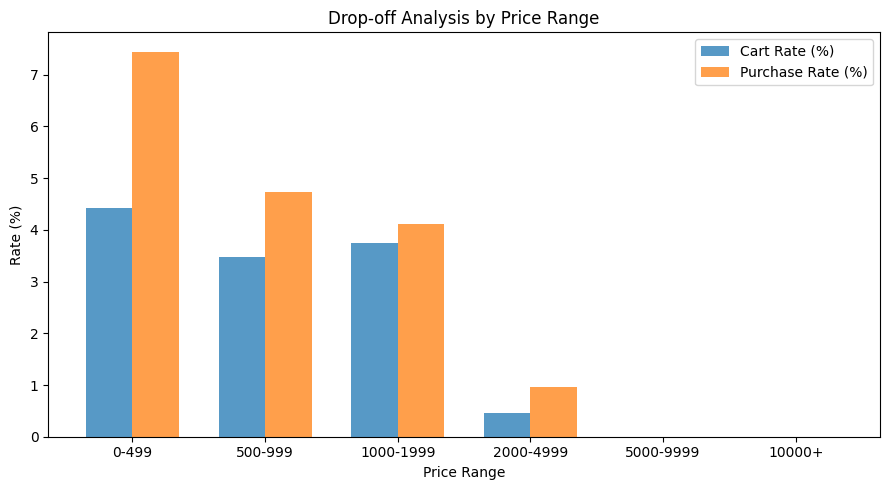

In [11]:
'''visualisation of price analysis'''

price_labels = price_group.index.astype(str).tolist()
cart_rates = price_group['cart_rate'].fillna(0).tolist()
purchase_rates = price_group['purchase_rate'].fillna(0).tolist()

x = np.arange(len(price_labels))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, cart_rates, width, label='Cart Rate (%)', alpha=0.75)
plt.bar(x + width/2, purchase_rates, width, label='Purchase Rate (%)', alpha=0.75)

plt.xticks(x, price_labels)
plt.xlabel("Price Range")
plt.ylabel("Rate (%)")
plt.title("Drop-off Analysis by Price Range")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
'''Drop off by brand analysis'''

df_brand = df[df['brand'].notnull()]
top_brands = df_brand['brand'].value_counts().head(5).index.tolist()

brand_funnel = df_brand[df_brand['brand'].isin(top_brands) & df_brand['event_type'].isin(funnel_steps)]
brand_group = brand_funnel.groupby(['brand', 'event_type'])['user_id'].nunique().unstack().fillna(0)
brand_group['cart_rate'] = brand_group['cart'] / brand_group['view'] * 100
brand_group['purchase_rate'] = brand_group['purchase'] / brand_group['view'] * 100
print(brand_group[['cart_rate', 'purchase_rate']])

event_type  cart_rate  purchase_rate
brand                               
Unknown      0.274975       2.862684
apple        7.832345       8.385983
huawei       5.230729       5.283167
samsung      7.858514       8.990951
xiaomi       5.658070       5.668705


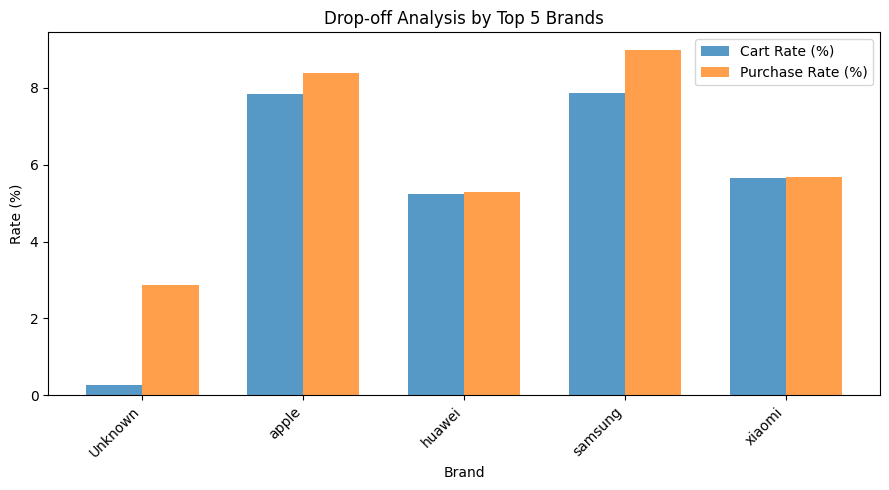

In [13]:
'''Visualisation for brand analysis'''
brand_labels = brand_group.index.astype(str).tolist()
cart_rates_brand = brand_group['cart_rate'].fillna(0).tolist()
purchase_rates_brand = brand_group['purchase_rate'].fillna(0).tolist()

x = np.arange(len(brand_labels))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, cart_rates_brand, width, label='Cart Rate (%)', alpha=0.75)
plt.bar(x + width/2, purchase_rates_brand, width, label='Purchase Rate (%)', alpha=0.75)

plt.xticks(x, brand_labels, rotation=45, ha='right')
plt.xlabel('Brand')
plt.ylabel('Rate (%)')
plt.title('Drop-off Analysis by Top 5 Brands')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
'''Drop off by product category'''

category_funnel = df[df['category_code'].notnull() & df['event_type'].isin(funnel_steps)]
top_categories = category_funnel['category_code'].value_counts().head(5).index.tolist()
cat_group = category_funnel[category_funnel['category_code'].isin(top_categories)]
cat_group = cat_group.groupby(['category_code', 'event_type'])['user_id'].nunique().unstack().fillna(0)
cat_group['cart_rate'] = cat_group['cart'] / cat_group['view'] * 100
cat_group['purchase_rate'] = cat_group['purchase'] / cat_group['view'] * 100
print(cat_group[['cart_rate', 'purchase_rate']])


event_type              cart_rate  purchase_rate
category_code                                   
Unknown                  1.549038       5.436643
computers.notebook       1.444400       5.421448
electronics.clocks       2.529782       4.510775
electronics.smartphone   9.414797      10.238528
electronics.video.tv     4.769255       6.019447


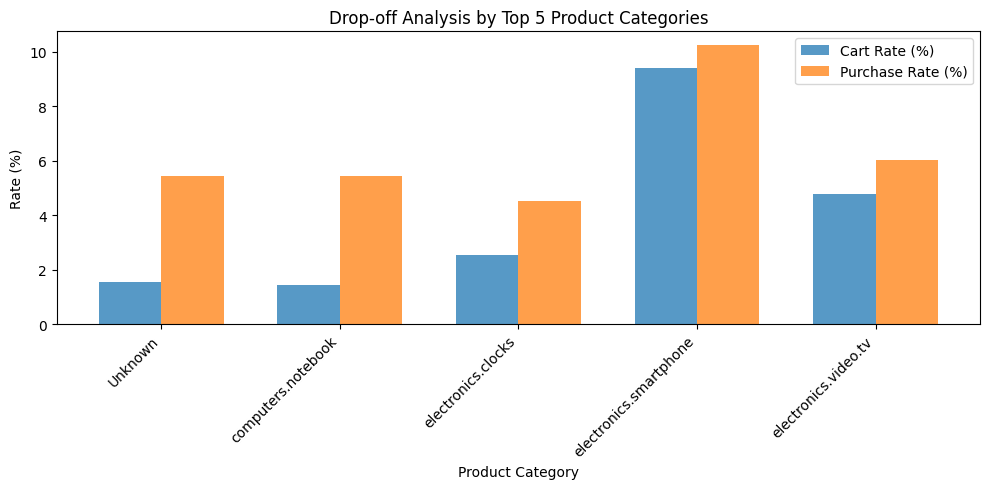

In [15]:
'''Visualisation for product category'''
category_labels = cat_group.index.astype(str).tolist()
cart_rates_cat = cat_group['cart_rate'].fillna(0).tolist()
purchase_rates_cat = cat_group['purchase_rate'].fillna(0).tolist()

x = np.arange(len(category_labels))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, cart_rates_cat, width, label='Cart Rate (%)', alpha=0.75)
plt.bar(x + width/2, purchase_rates_cat, width, label='Purchase Rate (%)', alpha=0.75)

plt.xticks(x, category_labels, rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Rate (%)')
plt.title('Drop-off Analysis by Top 5 Product Categories')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
'''Analysing session length'''
session_duration = df.groupby('user_session')['event_time'].agg(['min', 'max']) #new df with users first and latest activity
session_duration['session_length_sec'] = (session_duration['max'] - session_duration['min']).dt.total_seconds() #get duration of session in seconds
df = df.merge(session_duration['session_length_sec'], left_on='user_session', right_index=True) #adds the duration to df
session_purchase = df[df['event_type'] == 'purchase']['user_session'].unique()
df['purchased'] = df['user_session'].isin(session_purchase)
print(df.groupby('purchased')['session_length_sec'].mean())




purchased
False    839.743362
True     912.955537
Name: session_length_sec, dtype: float64


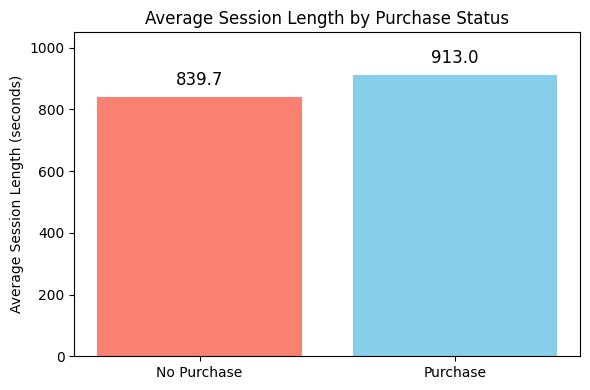

In [17]:
'''Visualisation of session length'''
avg_session = df.groupby('purchased')['session_length_sec'].mean()
labels = ['No Purchase', 'Purchase']
values = [avg_session[False], avg_session[True]]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, values, color=['salmon', 'skyblue'])
plt.ylabel('Average Session Length (seconds)')
plt.title('Average Session Length by Purchase Status')

# Add a bit of space above the highest bar
plt.ylim(0, max(values)*1.15)

# Add value annotation slightly below the new top
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 25, f"{values[i]:.1f}",
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()